# TF 심층 신경망 이해

심층 신경망은 MLP 신경망을 사용해서 머신러닝을 수행하는 기술을 칭한다.

## 딥러닝

딥러닝은 머신러닝의 한 종류이다. 이미지 인식에 대해서 딥러닝 관점에서 살펴보자,


### Machine Learning, Deep learning

기존 머신러닝과 딥러닝의 가장 <span class="mark">큰 차이점은 **특징량 추출** 이다</span>. 일반적으로 머신러닝은 이미지 내부의 특징을 하나 하나 지정해야 한다. 딥러닝은 학습 데이터에서 기계가 자동으로 추출한다는 점이 다른다.

<div align='center'>
    <img src='https://www.softwaretestinghelp.com/wp-content/qa/uploads/2019/04/DeepLearning.png'>
    <div align='center'>소스: https://www.softwaretestinghelp.com/data-mining-vs-machine-learning-vs-ai/</p>
</div>

사과와 포도를 구분한다고 할 때, 머신러닝은 특징을 *색에 주목해서 구분하자* 같이 직접 특징을 지시하는 알고리즘에 집중해서 사용한다면. 딥러닝은 대량의 데이터를 학습 시키면 이런 특징을 기계가 찾아내는 것이다.

#### 심층 신경망
 

- 2개 이상의 층을 포함한 신경망. 
- 다층 인공 신경망, 심층 신경망, 딥러닝을 같은 의미로 사용하기도 한다.

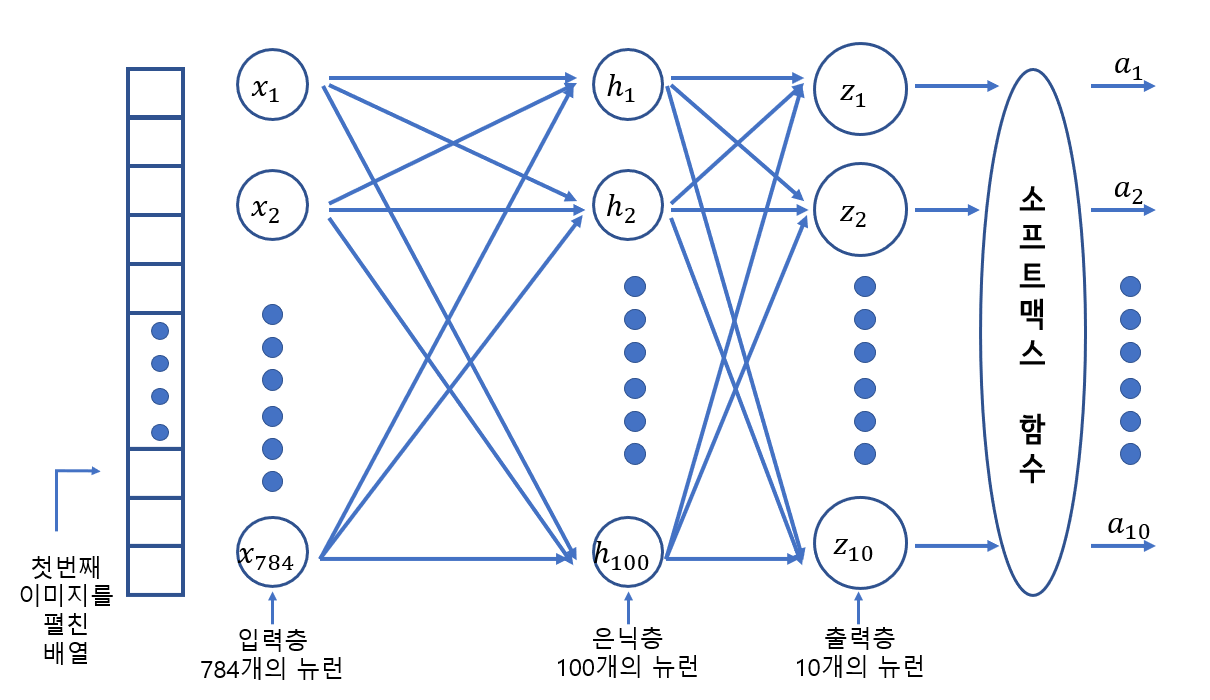

- 은닉층 : 입력층과 출력층 사이에 있는 모든 층
- 출력층에 적용하는 활성화 함수는 종류가 제한된다(이진 분류면 시그모이드, 다중 분류면 소프트맥스)
- 은닉층에 사용하는 활성화 함수는 비교적 자유롭다. (시그모이드, 볼 렐루 함수등이 사용됨)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

## - Fashin MNIST 데이터 세트

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:

<div align='center'>
  <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="600">   
  <div align="center">     <b>그림 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br>{nbsp}   </div>
</div>

패션 MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 [MNIST](http://yann.lecun.com/exdb/mnist/) 데이터셋을 대신해서 자주 사용됩니다. MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있습니다. 여기서 사용하려는 옷 이미지와 동일한 포맷입니다.

패션 MNIST는 일반적인 MNIST 보다 조금 더 어려운 문제이고 다양한 예제를 만들기 위해 선택했습니다. 두 데이터셋은 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 합니다. 코드를 테스트하고 디버깅하는 용도로 좋습니다.


여기에서 60,000개의 이미지를 사용하여 네트워크를 훈련하고 10,000개의 이미지를 사용하여 네트워크에서 이미지 분류를 학습한 정도를 평가합니다. TensorFlow에서 직접 Fashion MNIST에 액세스할 수 있습니다. TensorFlow에서 직접 [Fashion MNIST 데이터](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)를 가져오고 로드합니다.

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

그다음 이미지의 픽셀값을 0 ~ 255 범위에서 0 ~ 1 사이로 변환하고, 28 x 28 크기의 2차원 배열을 784 크기의 1차원 배열로 펼친다. 
train_test_split() 함수로 훈련 세트와 검증 세트로 나눈다.

In [ ]:
train_scaled = train_input / 255.0
# 2차원으로 변경
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## - 2개의 층

이제 인공 신경망 모델에 층을 2개 추가해 보자. 앞의 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집층이 추가된다. 이렇게 입력층과 출력층 사이에 있는 모든 층을 은닉층이라고 부른다. 은닉층에는 활성화 함수가 있다.

시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를 사용한 출력층을 케라스의 Dense 클래스로 만들어 보자.

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

> 은닉층의 뉴런 개수를 정하는데는 특별한 기준이 없다. 여기서 한 가지 제약 사항이 있다면 적어도 출력층의 뉴런보다는 많게 만들어야 한다. 

그다음 dense2는 출력층이다. 10개의 클래스를 분류하므로 10개의 뉴런을 두었고 활성화 함수는 소프트맥스 함수로 지정했다.

## - 심층 신경망 만들기

이제 앞에서 만든 dense1과 dense2 객체를 Sequential 클래스에 추가하여 심층 신경망을 만들어 보자.

In [ ]:
model = keras.Sequential([dense1, dense2])

Sequential 클래스의 객체를 만들 때 여러 개의 층을 추가하려면 위와 같이 리스트로 만들어 전달한다.
> 출력은 가장 마지막에 두어야 한다는 것이다. 

케라스는 모델의 summary() 메서드를 호출하면 층에 대한 유용한 정보를 얻을 수 있다.

이렇게 구성된 시퀀셜 네트워크의 출력, Dense 레이어의 파라미터 수는 ***`(입력측 뉴런 수 + 1) x (출력측 뉴런 수)`*** 식으로 구한다.

1. 레이어 1
 - 입력 2, 출력 2: (2+1)x2

2. 레이어 2

- 입력 2, 출력 1: (2+1)x1

In [ ]:
model.summary()

summary() 메서드의 마지막에는 총 모델 파라미터 개수와 훈련되는 파라미터 개수가 동일하게 79510으로 나온다. 그 아래 훈련되지 않는 파라미터는 0으로 나온다. 간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층이 있다. 이런 층의 파라미터 개수가 여기에 나온다.

## - 층을 추가하는 다른 방법

다음처럼 Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만드는 경우가 많다.

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

위와 같이 작업하면 아래처럼 추가되는 층을 한눈에 쉽게 알아보는 장점이 있다. 모델의 이름과 달리 층의 이름은 반드시 영문이어야 한다.

In [ ]:
model.summary()

#### `add()` 사용

Sequential 클래스에서 층을 추가할 때 가장 널리 사용하는 방법은 모델의 add() 메서드이다.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

이제 모델을 훈련해 보자. compile() 메서드의 설정은 1절에서 했던 것과 동일하다. 여기에서도 5번 에포크 동안 훈련해보자.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

> 인공 신경망에 몇 개의 층을 추가하더라도 compile() 메서드와 fit() 메서드의 사용법은 동일하다. 이것이 케라스 API의 장점이다.

## - 렐루 활성화 함수
렐루 함수는 아주 간단하다. 입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고 음수일 경우에는 0으로 만든다.

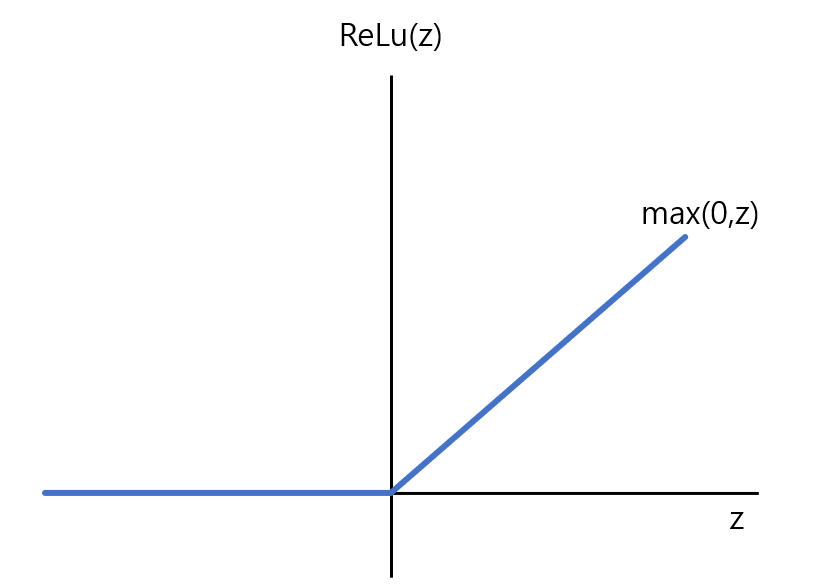

렐루 함수는 max(0,z)와 같이 쓸 수 있다. 이 함수는 z가 0보다 크면 z를 출력하고 z가 0보다 작으면 0을 출력한다. 렐루 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있다. 

은닉층의 활성화 함수에 시그모이드 함수 대신 렐루 함수를 적용하기 전에 케라스에서 제공하는 편리한 층 하나를 더 살펴보자.

패션 MNIST 데이터는 28 x 28 크기이기 때문에 인공 신경망에 주입하기 위해 넘파이 배열의 reshape() 메서드를 사용해 1차원으로 펼쳤다. 직접 이렇게 1차원으로 펼쳐도 좋지만 케라스에서는 이를 위한 Flatten 층을 제공한다.

사실 Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 한다. 입력에 곱해지는 가중치나 절편이 없다.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

첫 번째 등장하는 Flatten 클래스에 포함된 모델 파라미터는 0개이다. 

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

앞서 시그모이드 함수를 사용했을 때와 비교하면 성능이 크지 않지만 조금 향상 되었다.

In [ ]:
model.evaluate(val_scaled, val_target)

앞의 은닉층을 추가하지 않은 경우보다 몇 퍼센트 성능이 향상되었다.

## - 옵티마이저

케라스는 다양한 종류의 경사 하강법 알고리즘을 제공한다. 이들을 옵티마이저라고 부른다. 처음부터 모델을 구성하고 각종 하이퍼파라미터의 최적값을 찾는 것은 어려운 작업이다. 

compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용했다. 
여기서는 여러 가지 옵티마이저를 테스트해 보자. 

#### 1) SGD

가장 기본적인 옵티마이저는 확률적 경사 하강법인 SGD이다. 

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

이 옵티마이저는 tensorflow,keras.optimizers 패키지 아래 SGD 클래스로 구현되어 있다.

In [ ]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

다음과 같이 원하는 학습률을 learning_rate 매개변수에 지정하여 사용한다.

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

#### 2) Momentum

- SGD 클래스의 momentum 매개변수의 기본값은 0이다. 이를 0보다 큰 값으로 지정하면 마치 이전의 그레이디언트를 가속도처럼 사용하는 모멘텀 최적화를 사용한다. 보통 0.9 이상을 지정한다. 
- nesterov 매개변수를 기본값 False에서 True로 바꾸면 네스테로프 모멘텀 최적화를 사용한다.

네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현한다. 대부분의 경우 네스테로프 모멘텀 최적화가 기본 확률적 경사 하강법보다 더 나은 성능을 제공한다.

모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있다. 이렇게 하면 안정적으로 최적점에 수렴할 가능성이 높다. 이런 학습률을 **적응적 학습률** 이라고 한다. 이런 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있는 것이 장점이다.

In [ ]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

#### 3) Adagrad

적응적 학습률을 사용하는 대표적인 옵티마이저는 Adagrad와 RMSprop 이다. optimizer 매개변수의 기본값이 바로 rmsprop이다. 이 두 옵티마이저의 매개변수를 바꾸고 싶다면 SGD와 같이 Adagrad와 RMSprop 클래스 객체를 만들어 사용한다.

In [ ]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

#### 4) RMSprop

- 적응적 학습률을 사용하는 대표적인 옵티마이저 중 하나.
- Adagard처럼 그레이디언트 제곱으로 학습률을 나누지만 최근의 그레이디언트를 사용하기 위해 지수 감소를 사용한다.
- learining_rate로 학습률을 지정하며 기본값은 0.001
- rho 매개변수에서 감소 비율을 지정하며 기본값은 0.9

In [ ]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

#### 5) Adam

모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam이다. Adam 클래스도 keras.optimizers 패키지 아래에 있다. 적응적 학습률을 사용하는 3개의 클래스는 learning_rate 매개변수의 기본값으로 모두 0.001을 사용한다.

여기에서는 Adam 클래스의 매개변수 기본값을 사용해 패션 MNIST 모델을 훈련해 보자.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

In [ ]:
model.evaluate(val_scaled, val_target)

### 옵티마이저 성능 비교

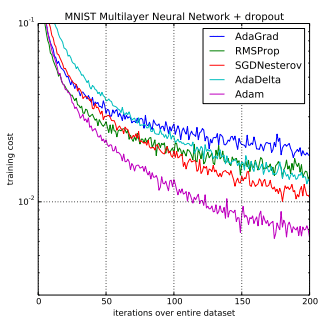

# Adam Optimizer 이용한 F MNIST 모델 학습


여기에서는 Adam 클래스의 매개변수 기본값을 사용해 패션 MNIST 모델을 훈련해 보자.

### Tqdm 과 Keras Integration

https://github.com/tqdm/tqdm/#installation

```
pip install tqdm
```

```
conda install -c conda-forge tqdm
```

In [14]:
! pip install tqdm


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [15]:
from tqdm import tqdm
from time import sleep

text = ""
for char in tqdm(["a", "b", "c", "d"]):
    sleep(0.25)
    text = text + char

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.98it/s]


### 모델 학습

Flatten 층을 사용해서 이미지 입력을 받는 모델을 구성해 보자

In [25]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_input.shape, train_target.shape

((60000, 28, 28), (60000,))

In [26]:
# 정규화
train_scaled = train_input / 255.0
# 2차원으로 변경 <-- Flatten 층 사용을 대체
# train_scaled = train_scaled.reshape(-1, 28*28) 

In [27]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [28]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

keras.fit() 메서드 verbose=0 으로 지정하고  callback 매개변수에 TqdmCallback을 사용해 Tqdm으로 출력

```python
from tqdm.keras import TqdmCallback

model.fit(..., verbose=0, callbacks=[TqdmCallback()])
```

In [37]:
from tqdm.keras import TqdmCallback

# history = model.fit(train_scaled, train_target, epochs=25, verbose=0, callbacks=[TqdmCallback()])
history = model.fit(train_scaled, train_target, epochs=25, validation_split=0.25, verbose=0, callbacks=[TqdmCallback()])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [38]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4529 - accuracy: 0.8800


[0.4529036581516266, 0.8799999952316284]

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

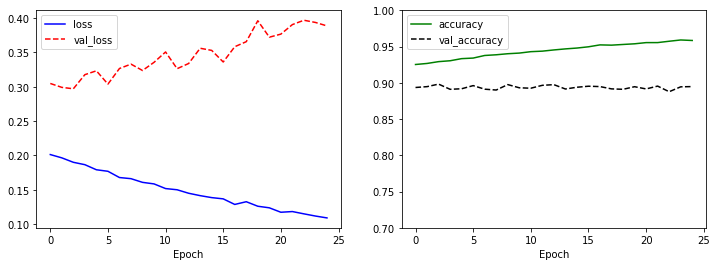

In [40]:
# Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

## ex) 분류 모델에서 손실함수를 `mse` 로 쓰면?

F MNIST 학습을 손실함수를 mse 로 변경해서 학습을 수행해 보자

In [ ]:
# 모델 컴파일: optimizer, loss, metrics 지정
model.compile(optimizer='', loss='', metrics='')

In [ ]:
# 학습 
history = model.fit()

크로스 엔트로피로 학습한 결과는 89% 정확도를 보여주었었다.

In [ ]:
model.evaluate(val_scaled, val_target)

In [ ]:
history.history.keys()

In [ ]:
# Fashion MNIST 분류 모델 학습 결과 시각화


